# Проект: Анализ бизнес-показателей приложения Procrastinate Pro+

Вводная информация о проекте и датасете:

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`
- заказы: `/datasets/orders_info_short.csv`
- расходы: `/datasets/costs_info_short.csv`

Структура `visits_info_short.csv:` <br>
`User Id` — уникальный идентификатор пользователя, <br>
`Region` — страна пользователя,<br>
`Device` — тип устройства пользователя,<br>
`Channel` — идентификатор источника перехода,<br>
`Session Start` — дата и время начала сессии,<br>
`Session End` — дата и время окончания сессии.<br> <br>
Структура `orders_info_short.csv:`<br>
`User Id` — уникальный идентификатор пользователя,<br>
`Event Dt` — дата и время покупки,<br>
`Revenue` — сумма заказа.<br> <br>
Структура `costs_info_short.csv:`<br>
`dt` — дата проведения рекламной кампании,<br>
`Channel` — идентификатор рекламного источника,<br>
`costs` — расходы на эту кампанию.<br>

ТЗ проекта:<br>
- выполнить предобработку
- задать функции для расчетов 
- провести ИАД:
1. Составить профили пользователей. Минимальная и максимальая даты привлечения пользователей.
2. Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. 
3. Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.
4. Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. 
- Маркетинг:
1. Посчитать общую сумму расходов на маркетинг.
2. Распределение по рекламным источникам, то есть сколько денег потратили на каждый источник.
3. Визуализация динамики изменения расходов во времени по неделям по каждому источнику. 
4. Сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 
- Проанализировать окупаемость рекламы
- Сделать общие выводы, дать промежуточные рекомендации для рекламного отдела.

### Предобработка данных, общая информация


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
def get_info(df):
    return df.info(), display(df.head())

get_info(visits)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

(None, None)

In [3]:
orders = pd.read_csv('/datasets/orders_info_short.csv')
get_info(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

(None, None)

In [4]:
costs = pd.read_csv('/datasets/costs_info_short.csv')
get_info(costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

(None, None)

Сразу видим, что колонки названы по-разному, нужно привести в snake_case, пропуски отсутствуют во всех датафреймах. Еще нужно преревести дату и время во всех колонках к типу даты из object.

In [5]:
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


Явных дубликатов нет


In [6]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
orders.columns = ['user_id', 'event_dt', 'revenue']
costs.columns = ['dt', 'channel', 'costs']

In [7]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

Теперь данные готовы к анализу. Пропусков, дубликатов нет, имена столбцов изменены, тип данных столбцов с временем изменен на datetime.

### Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Профили пользователей

In [8]:
def get_profiles(sessions, orders, ad_costs):

    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Удержание

In [9]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    dimensions = ['payer'] + dimensions

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time 

#### Конверсия

In [10]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    if 'cohort' in dimensions: 
        dimensions = []

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time 

#### LTV, ROI

In [11]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )

        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes

        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        roi = result.div(cac['cac'], axis=0)

        roi = roi[~roi['cohort_size'].isin([np.inf])]

        roi['cohort_size'] = cohort_sizes

        roi['cac'] = cac['cac']

        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    if 'cohort' in dimensions:
        dimensions = []

    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Фильтрация

In [12]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

#### График удержания

In [13]:
def plot_retention(retention, retention_history, horizon, window=7):

    plt.figure(figsize=(15, 10))

    retention = retention.drop(columns=['cohort_size', 0])

    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    ax3 = plt.subplot(2, 2, 3)
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]

    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### График конверсии

In [14]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    plt.figure(figsize=(15, 5))

    conversion = conversion.drop(columns=['cohort_size'])
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### График LTV, ROI

In [15]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])

    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    cac_history = roi_history[['cac']]

    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Функции заданы, можно приступать к исследовательскому анализу данных

### Исследовательский анализ данных

- Составить профили пользователей. Определить минимальную и максимальную даты привлечения пользователей.
- Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. 
- Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.
- Изучить рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. 

#### Получение профилей, определение минимальной и максимальной даты

In [16]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

user_id            first_ts     channel  device         region         dt  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States 2019-05-07   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States 2019-07-09   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France 2019-10-01   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany 2019-08-22   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States 2019-10-02   

       month  payer  acquisition_cost  
0 2019-05-01   True          1.088172  
1 2019-07-01  False          1.107237  
2 2019-10-01  False          0.000000  
3 2019-08-01  False          0.988235  
4 2019-10-01  False          0.230769

In [17]:
min_analysis_date = profiles['dt'].min()
print(min_analysis_date)
observation_date = profiles['dt'].max() 
print(observation_date)

2019-05-01 00:00:00
2019-10-27 00:00:00


Профили пользователей составлены, минимальный и максимальный дни привлечения найдены (минимальная дата привлечения пользователей - 1 мая 2019 года. Максимальная дата - 27 октября 2019 года).

In [18]:
profiles['region'].value_counts().sort_values(ascending = False)

United States    100002
UK                17575
France            17450
Germany           14981
Name: region, dtype: int64

Подавляющее количество пользователей зарегестрированы в США. Количество пользователей из Великобритании и Франции примерно равны. Меньше всего пользователей из Германии

#### Сводные таблицы по проценту платящих пользователей

In [19]:
payer_ct = profiles.pivot_table(index='region', values='user_id', aggfunc='count')
payer_ct['payer'] = profiles.query('payer == True').groupby('region')['user_id'].count()
payer_ct['percent'] = (payer_ct['payer'] / payer_ct['user_id'] * 100).round(1)
payer_ct

user_id  payer  percent
region                                
France           17450    663      3.8
Germany          14981    616      4.1
UK               17575    700      4.0
United States   100002   6902      6.9

Больше всего платящих пользователей, ожидаемо, из Америки. По соотношению количества клиентов к платящим пользователям, США тоже лидирует

In [20]:
device_ct = profiles.pivot_table(index='device', values='user_id', aggfunc='count')
device_ct['payer'] = profiles.query('payer == True').groupby('device')['user_id'].count()
device_ct['percent'] = (device_ct['payer'] / device_ct['user_id'] * 100).round(1)
device_ct

user_id  payer  percent
device                          
Android    35032   2050      5.9
Mac        30042   1912      6.4
PC         30455   1537      5.0
iPhone     54479   3382      6.2

По количеству платящих пользователей впереди IPhone (из-за того, что большинство пользователей пользуются приложением на этой платформе). По соотношению количества пользователей платформы к количеству платящих пользователей - впереди Mac (6,4), затем, IPhone (6,2), Android (5,9). Меньше всего соотношение на PC (5,0).

In [21]:
channel_ct = profiles.pivot_table(index='channel', values='user_id', aggfunc='count')
channel_ct['payer'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
channel_ct['percent'] = (channel_ct['payer'] / channel_ct['user_id'] * 100).round(1)
channel_ct.sort_values(by='payer', ascending=False)

user_id  payer  percent
channel                                    
FaceBoom              29144   3557     12.2
TipTop                19561   1878      9.6
organic               56439   1160      2.1
WahooNetBanner         8553    453      5.3
AdNonSense             3880    440     11.3
RocketSuperAds         4448    352      7.9
LeapBob                8553    262      3.1
OppleCreativeMedia     8605    233      2.7
lambdaMediaAds         2149    225     10.5
YRabbit                4312    165      3.8
MediaTornado           4364    156      3.6

Больше всего платящих пользователей приходят из каналов FaceBoom, TipTop, organic, WahooNetBanner. По соотношению всех новых пользователей к платящим пользователям в топе: FaceBoom, TipTop, AdNonSense, lambdaMediaAds.

Подводя итоги, можно сказать, что большинство платящих пользователей из Америки, популярные платформы - Mac, Iphone, лучшие каналы для привлечения платящих пользователей - FaceBoom, TipTop, AdNonSense, lambdaMediaAds

### Маркетинг

- Посчитать общую сумму расходов на маркетинг.
- Выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построить график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. 
- Сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

#### Общая сумма расходов на маркетинг, динамика измнения затрат

In [22]:
#общая сумма расходов на маркетинг и на каждый источник
channel_costs = costs.groupby('channel')['costs'].sum()
display(channel_costs.sort_values(ascending=False))
channel_costs.sum()

channel
TipTop                54751.30
FaceBoom              32445.60
WahooNetBanner         5151.00
AdNonSense             3911.25
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
LeapBob                1797.60
lambdaMediaAds         1557.60
MediaTornado            954.48
YRabbit                 944.22
Name: costs, dtype: float64

105497.30000000005

Всего было потрачено 105497,3 на рекламу. В топе по каналам привлечения (потраченные средства) - TipTop, FaceBoom, на них приходится около 81% всех затрат, далее - WahooNetBanner, AdNonSense и т.д.

In [23]:
costs_pivot = costs.pivot_table(index='dt', columns='channel', values='costs')

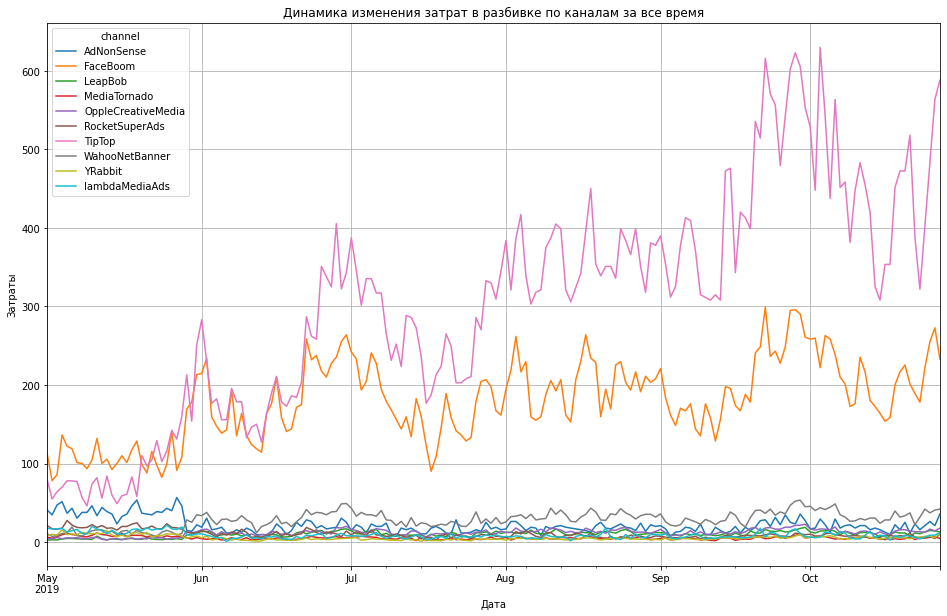

In [24]:
costs_pivot.plot(figsize=(16, 10), grid=True)

plt.title('Динамика изменения затрат в разбивке по каналам за все время')
plt.xlabel('Дата')
plt.ylabel('Затраты')
plt.show()

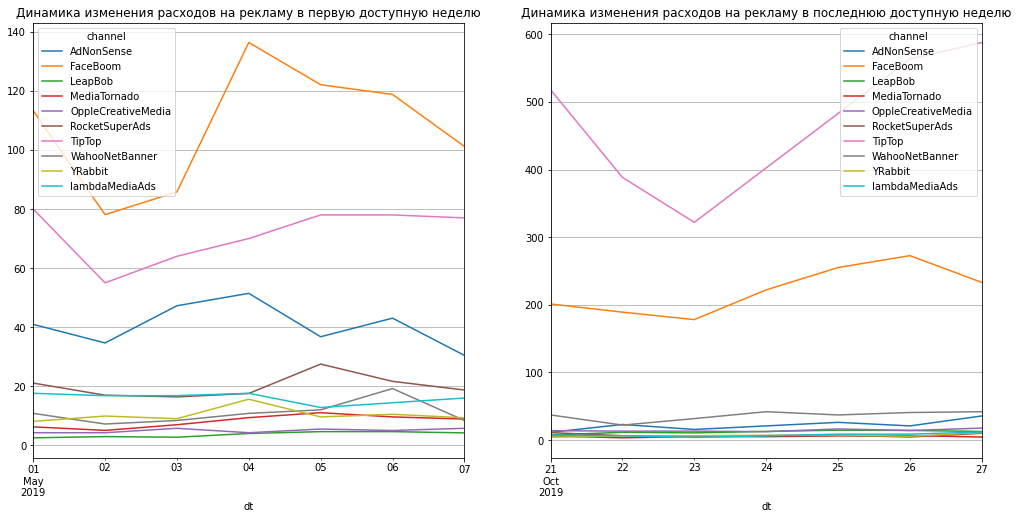

In [25]:
costs_pivot.query('index <= "2019-05-07"').plot(figsize=(17, 8), grid=True, ax=plt.subplot(1, 2, 1))
plt.title('Динамика изменения расходов на рекламу в первую доступную неделю')
costs_pivot.query('index >= "2019-10-21"').plot(figsize=(17, 8), grid=True, ax=plt.subplot(1, 2, 2))
plt.title('Динамика изменения расходов на рекламу в последнюю доступную неделю')
plt.show()

С помощью визуализации графиков, можно сделать вывод, что расходы на рекламу в FaceBoom и TipTop сильно выросли, если сравнивать с первой доступной неделей. TipTop уходила выше 600, FaceBoom была около 300. Расходы на рекламу в других источниках примерно остаются таким же, как и в первую неделю.

#### Стоимость привлечения одного пользователя

In [26]:
channels = profiles.pivot_table(index='channel', values='user_id', aggfunc='count')
channels['cost_per_one'] = profiles.groupby('channel')['acquisition_cost'].mean().round(2)
channels['costs'] = costs.pivot_table(index='channel', values='costs', aggfunc='sum')
channels = channels.query('index != "organic"')
display(channels.sort_values(by='costs', ascending=False).fillna(0))
mid_cac = profiles.query('channel != "organic"')['acquisition_cost'].mean()
mid_cac

user_id  cost_per_one     costs
channel                                            
TipTop                19561          2.80  54751.30
FaceBoom              29144          1.11  32445.60
WahooNetBanner         8553          0.60   5151.00
AdNonSense             3880          1.01   3911.25
OppleCreativeMedia     8605          0.25   2151.25
RocketSuperAds         4448          0.41   1833.00
LeapBob                8553          0.21   1797.60
lambdaMediaAds         2149          0.72   1557.60
MediaTornado           4364          0.22    954.48
YRabbit                4312          0.22    944.22

1.1274813239427588

Итак, в среднем, самый "дорогой" клиент приходит из TipTop - 2,8 за одного пользователя. Второй по средней цене - FaceBoom, 1,1 за одного пользователя. Но в то же время, из FaceBoom пришло на 10 тысяч человек больше, чем из TipTop, при этом, затраты на рекламу меньше на 22 тысячи. Остальные сервисы для привлечения аудитории берут в среднем от 0.2 до 1 за человека, но количество пользователей, поступивших от них, гораздо меньше чем пользователей, поступивших из FaceBoom, TipTop. Средний CAC по приложению - 1,127 за человека. <br>
**Стоит сократить расходы на рекламу через TipTop, и больше вкладывать в рекламу с меньшей стоимостью за пользователя (LeapBob, MediaTornado, YRabbit)**

### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализировать окупаемость рекламы. Момент анализа - 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 

    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?


#### Общий LTV, ROI, CAC

In [27]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа 
horizon_days = 14  # горизонт анализа 

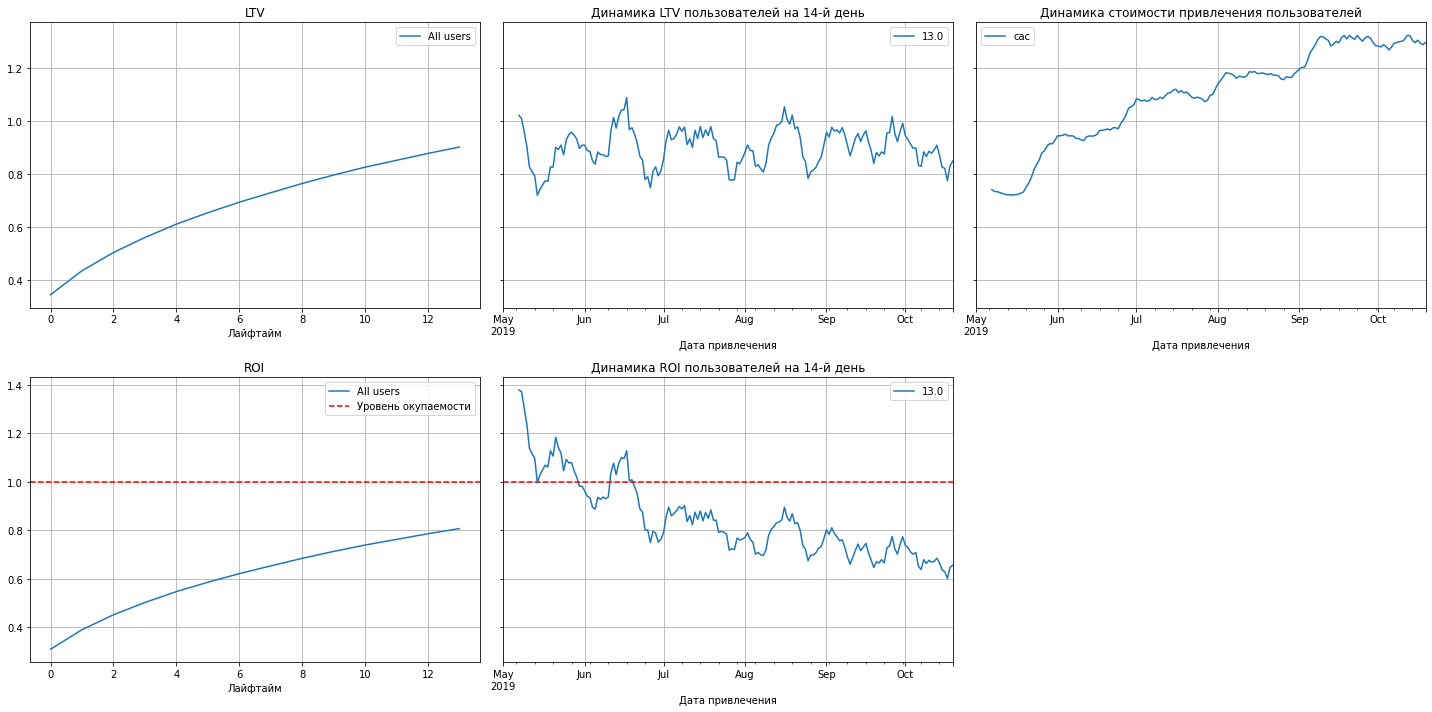

In [28]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

- Реклама не окупается (ROI не дошел до уровня окупаемости)
- САС достаточно сильно вырос с мая
- В конце июня пользователи перестали окупаться
- LTV стабилен

#### LTV, ROI, CAC в разбивке по регионам

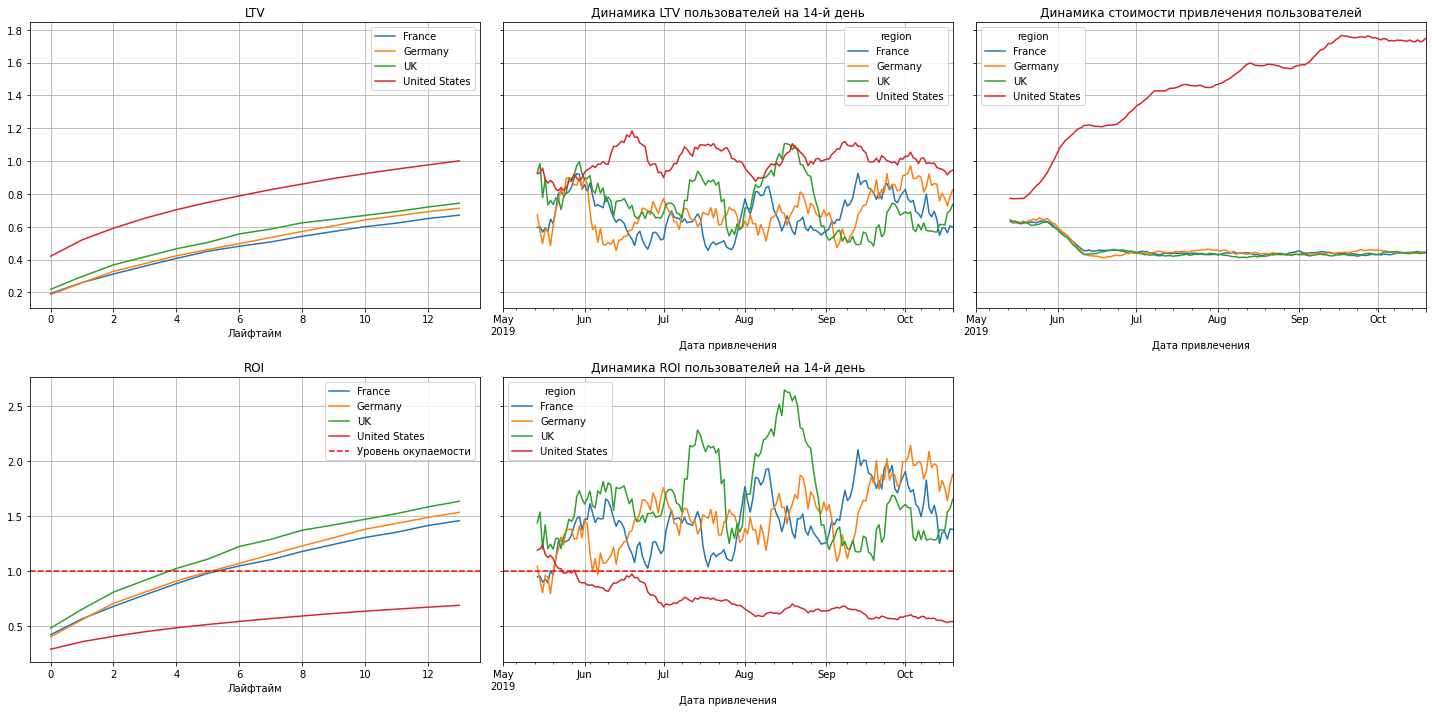

In [29]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

- LTV пользователей из США самый высокий, но затраты на рекламу не окупаются. 
- Стоимость привлечения пользователей сильно выросла в США, в остальных регионах она достаточно стабильна

#### LTV, ROI, CAC в разбивке по каналам привлечения

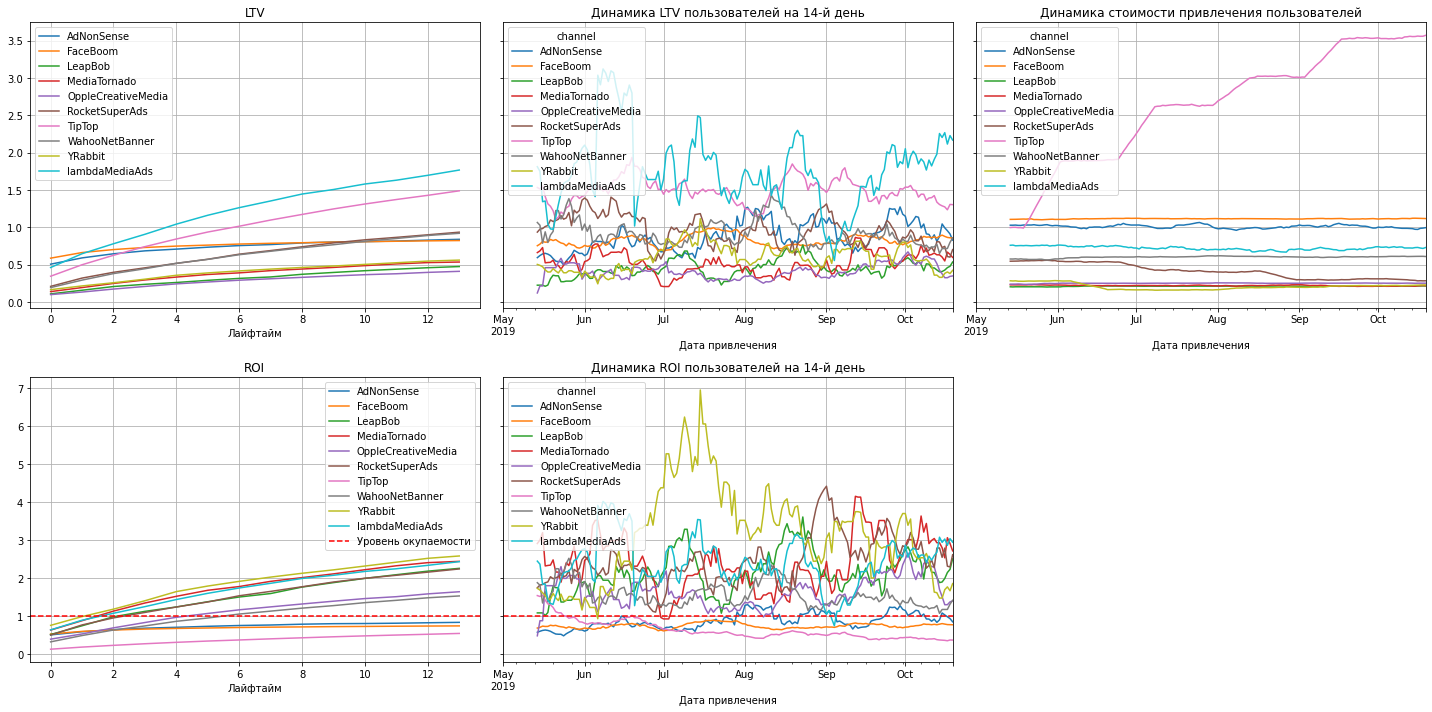

In [30]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- Сильно выросла стоимость привлечения пользователей у TipTop
- Не окупаются: AdNonSense, FaceBoom, TipTop
- LTV достаточно разный у всех средств привлечения

#### LTV, ROI, CAC в разбивке по платформам

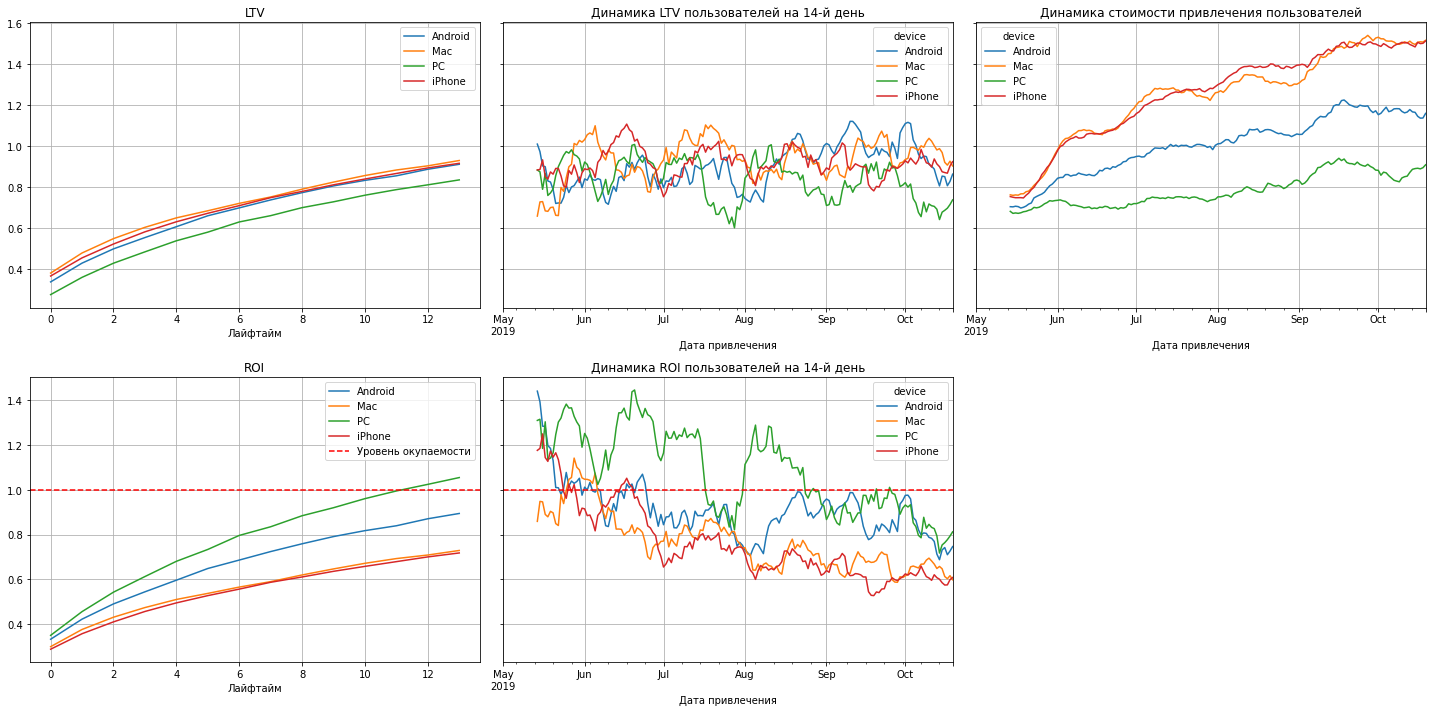

In [31]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

- Не окупаются к концу 2 недель пользователи всех платформ, кроме PC
- LTV примерно одинаковый на всех платформах
- Больше всего выросла стоимость привлечения на IPhone, Mac. Меньше всего на PC

#### Графики удержания 

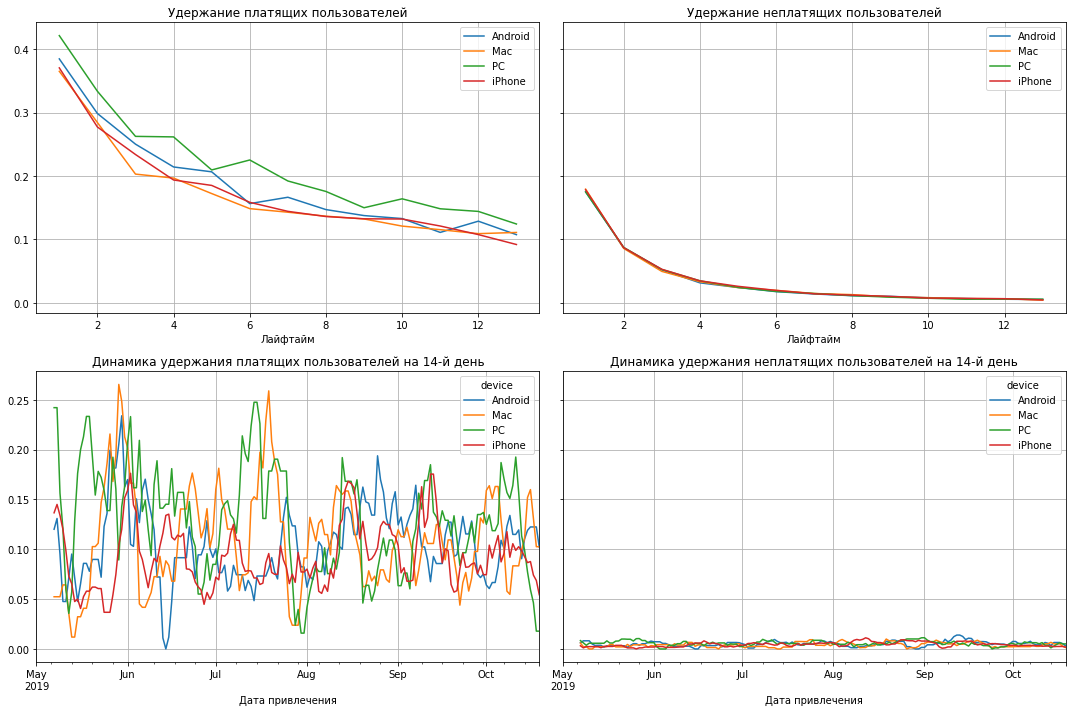

In [32]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Динамика удержания пользователей в разбивке по платформам приблизительно одинакова

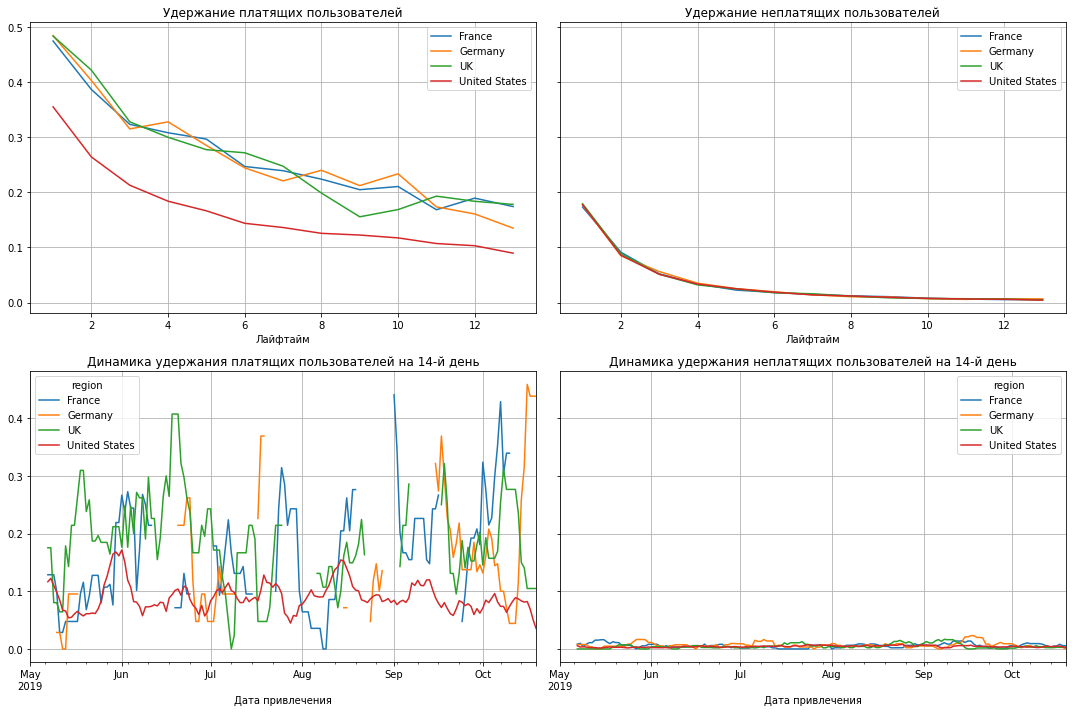

In [33]:
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

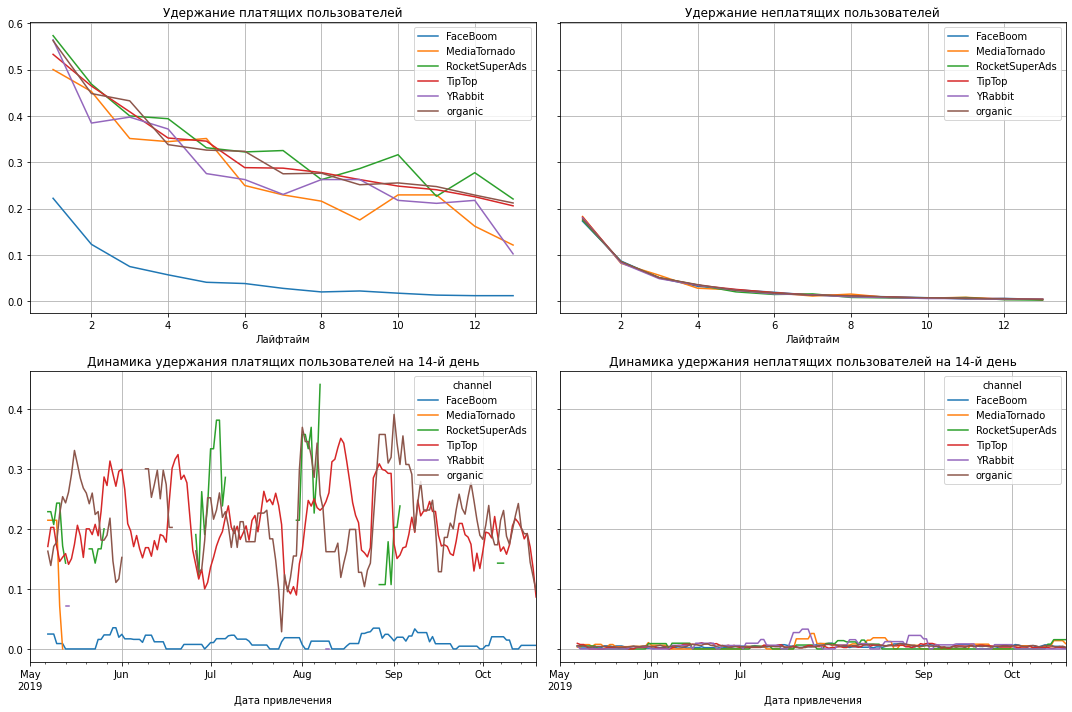

In [34]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('region == "United States"'), visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Худшее удержание в США на канале FaceBoom

Удержание платящих пользователей ниже всех регионов - в США

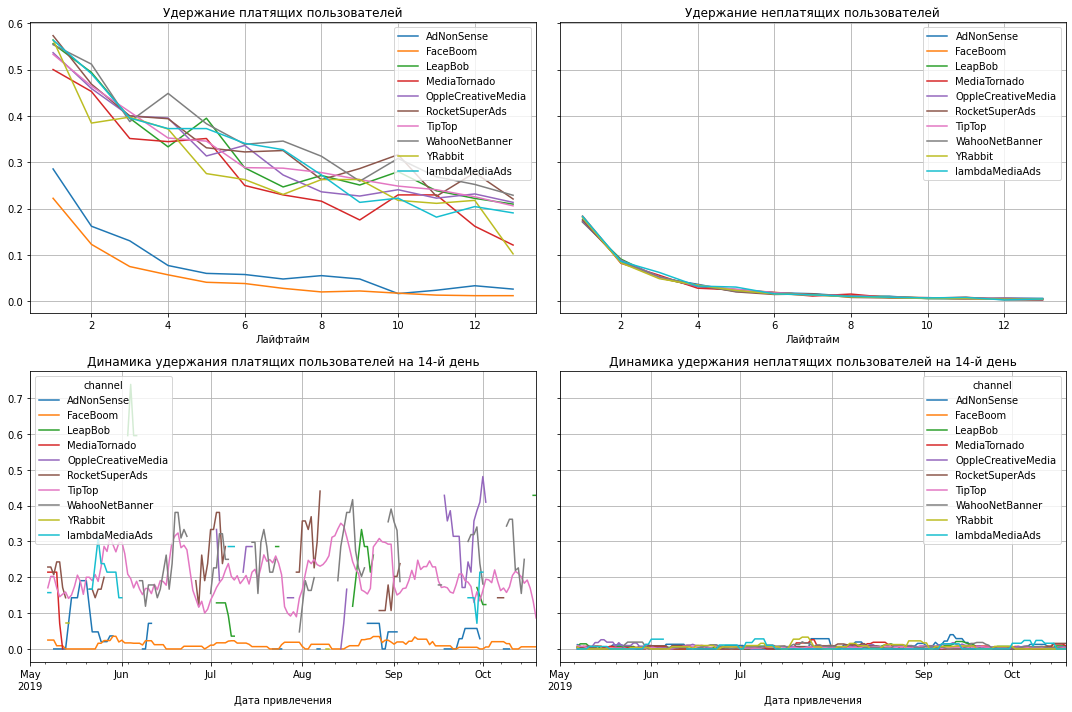

In [35]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Динамика удержания платящих пользователей ниже всего на каналах привлечения: AdNonSense, FaceBoom

- реклама не окупается
- Регион США снижает окупаемость рекламы (там большее количество пользователей приложения, чем из других регионов вместе взятых). Из каналов: TipTop, FaceBoom, AdNonSense не окупаются, реклама не эффективна. По платформам: худший ROI у пользователей IPhone и Mac

Проблемы окупаемости вызваны несколькими факторами, такими как:
- увеличение стоимости привлечения пользователя
- большие траты на дорогой канал привлечения TipTop, FaceBoom, AdNonSense
- рекламные кампании в каналах привлечения с низкой средней стоимостью привлечения недостаточно финансируются
- возможны сбои в приложении у пользователей платформ кроме PC
- стоимость привлечения сильно выросла в регионе США

#### Графики конверсии

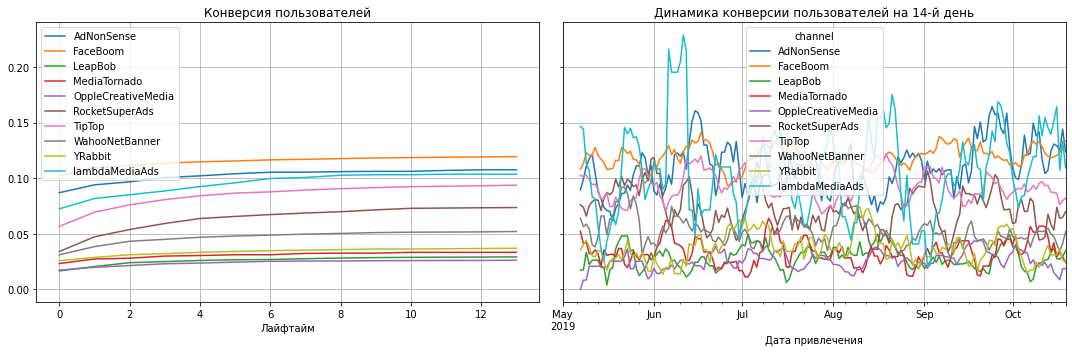

In [36]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

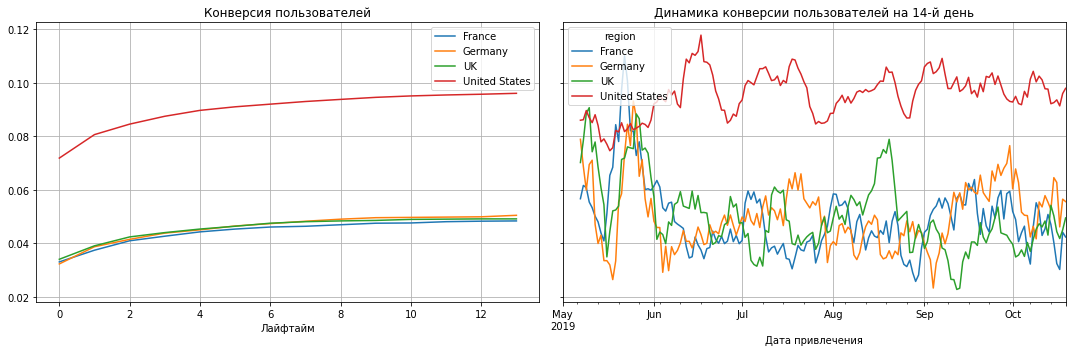

In [37]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

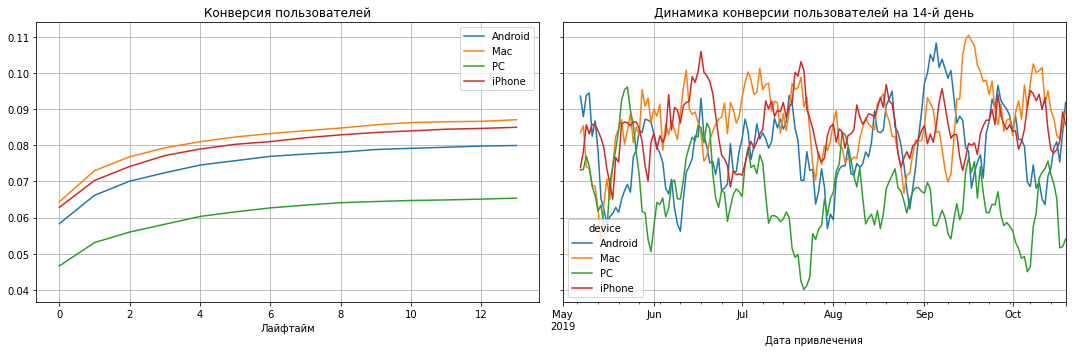

In [38]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

По конверсии - лучшая конверсия в регионе США, у каналов TipTop, FaceBoom, AdNonSense, lambdaMediaAds, RocketSuperAds, на платформах Mac, IPhone

### Вывод

В ходе исследования было выяснено, что: 
- самый "дорогой" клиент приходит из TipTop - 2,8 за одного пользователя. Второй по средней цене - FaceBoom, 1,1 за одного пользователя. 
- остальные сервисы для привлечения аудитории берут в среднем от 0.2 до 1 за человека
- средний CAC по приложению - 1,127 за человека
- всего было потрачено 105497,3 на рекламу. В топе по каналам привлечения (потраченные средства) - TipTop, FaceBoom, на них приходится около 81% всех затрат, далее - WahooNetBanner, AdNonSense и т.д.
- больше всего платящих пользователей приходят из каналов FaceBoom, TipTop, organic, WahooNetBanner. По соотношению всех новых пользователей к платящим пользователям в топе: FaceBoom, TipTop, AdNonSense, lambdaMediaAds.

Далее, был проведен анализ бизнес-показателей, где выяснилось, что реклама **не окупается**<br>
Проблемы окупаемости вызваны несколькими факторами, такими как:
- увеличение стоимости привлечения пользователя
- большие траты на дорогой канал привлечения TipTop, FaceBoom, AdNonSense
- рекламные кампании в каналах привлечения с низкой средней стоимостью привлечения недостаточно финансируются
- возможны сбои в приложении у пользователей платформ кроме PC
- стоимость привлечения сильно выросла в регионе США

Исходя из этого, можно посоветовать отделу маркетинга:
- по платформам: проверить на баги приложения на платформах IOS, Mac. Возможно, есть неисправность. Привлекать больше пользователей окупающихся платформ - Android, PC
- стоит обратить внимание на некоторые недооцененные каналы: Yrabbit, MediaTornado, lambdaMediaAds, LeapBob. У них неплохой ROI и низкая стоимость привлечения пользователя
- снизить затраты на рекламу в самых дорогих каналах привлечения: TipTop, FaceBoom, AdNonSense. Они сильно портят окупаемость. На каналах FaceBoom, AdNonSense хорошая конверсия, но плохое удержание. TipTop самая дорогая
- исправить причины низкой конверсии на платформе PC, а так же на большинстве каналов привлечения, кроме TipTop, FaceBoom, AdNonSense, lambdaMediaAds, RocketSuperAds, нужно обратить на это внимание
- Применить новые методы маркетинга для пользователей из США. Реклама в канале TipTop и FaceBoom неэффективна и убыточна в этом регионе. К тому же САС очень сильно выросла для TipTop, а у FaceBoom ухудшее удержание